<a href="https://colab.research.google.com/github/Jasmeet0810/daily-birth-forecasting-in-ML/blob/main/Daily_Birth_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9buexefw/jzejgaiv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9buexefw/b9v3czb9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64307', 'data', 'file=/tmp/tmp9buexefw/jzejgaiv.json', 'init=/tmp/tmp9buexefw/b9v3czb9.json', 'output', 'file=/tmp/tmp9buexefw/prophet_modelu6fardw0/prophet_model-20240510183217.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


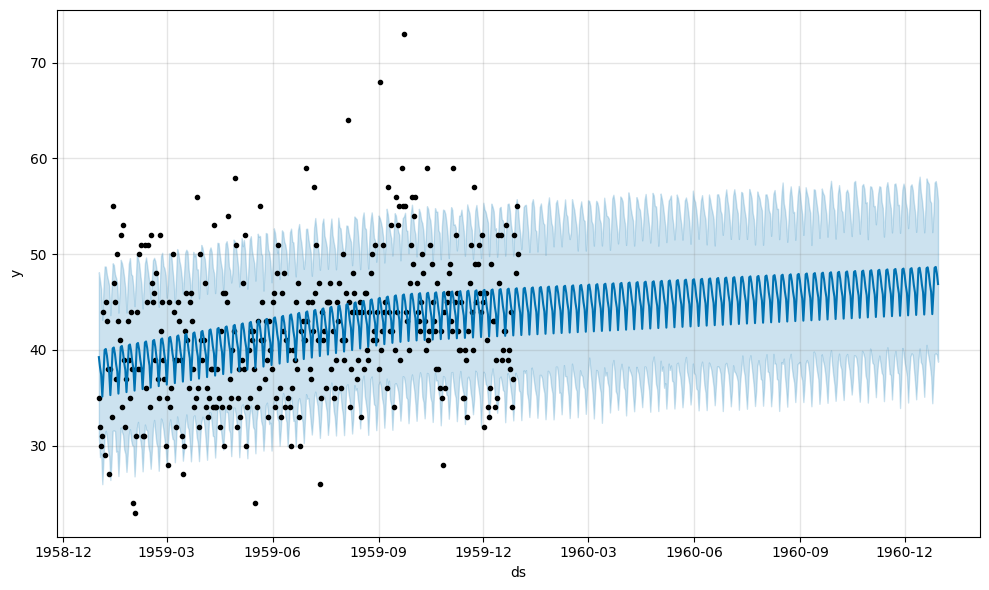

In [5]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet

# Load the dataset
df_data = pd.read_csv('/content/daily-total-female-births-CA.csv')

# Prepare the dataset by cleaning, transforming, and pivot-tabling the data
# This step is not shown in the code, as it depends on the initial state of the dataset

# Analyze the seasonality effects
df_data['date'] = pd.to_datetime(df_data['date'])
df_data['year'] = df_data['date'].dt.year
df_data['month'] = df_data['date'].dt.month
df_data['day'] = df_data['date'].dt.day

# Split the data into training and test sets
df_data_train = df_data[df_data["date"] < "2024-01-01"]
df_data_test = df_data[df_data["date"] >= "2024-01-01"]

# Rename the columns to match Prophet's expectations
df_data_train.rename(columns={"date": "ds", "births": "y"}, inplace=True)

# Check for missing values and handle them appropriately
missing_values = df_data_train.isnull().sum()
if missing_values["ds"] > 0 or missing_values["y"] > 0:
    # Handle missing values (e.g., drop rows with missing values)
    df_data_train.dropna(subset=["ds", "y"], inplace=True)

# Create and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(df_data_train)

# Make predictions and visualize the results
future = model_prophet.make_future_dataframe(periods=365)
forecast = model_prophet.predict(future)

fig = model_prophet.plot(forecast)